# Golden Ratio: $1.618\cdots$
## ความลับที่นักคณิตศาสตร์ไม่ได้บอกคุณ

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme()  

In [2]:
np.random.seed(7) # set random generator
M = 2 # rows
N = 2 # cols

A = np.random.randn(M, N)
v = np.random.randn(1, M)

In [3]:
A, v

(array([[ 1.6905257 , -0.46593737],
        [ 0.03282016,  0.40751628]]),
 array([[-0.78892303,  0.00206557]]))

In [4]:
v_new = np.dot(v, A)
v

array([[-0.78892303,  0.00206557]])

## Linear Transformation

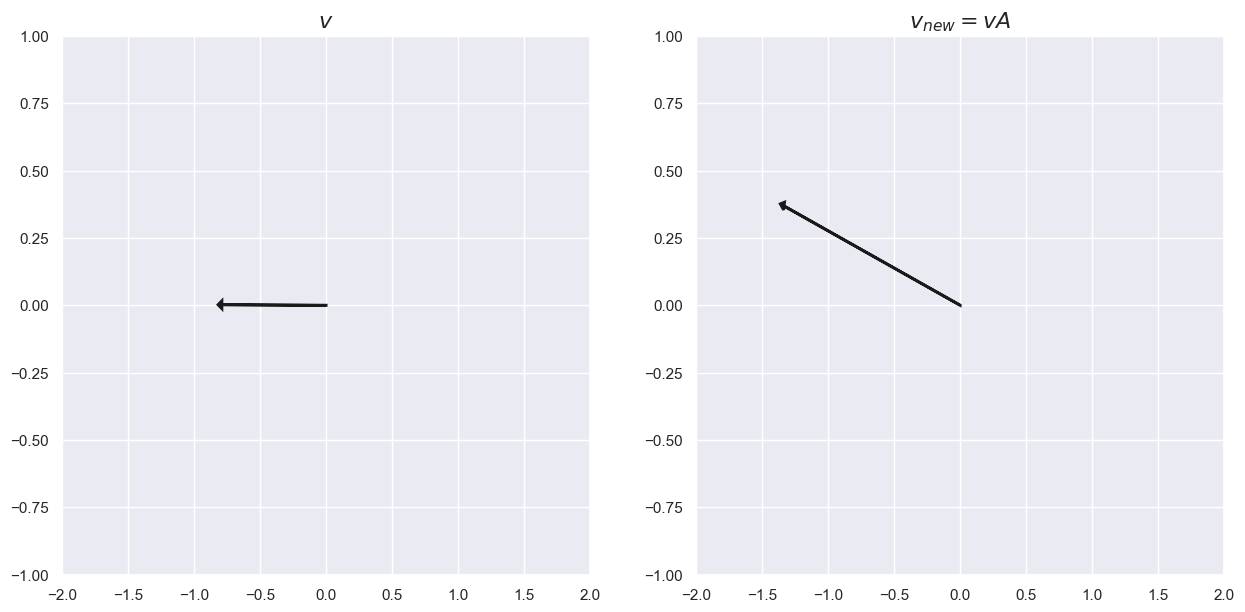

In [5]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.arrow(0, 0, v[0][0], v[0][1], head_width=0.03, head_length=0.03, linewidth=2,  fc='k', ec='k')
plt.xlim(-2, 2)
plt.ylim(-1, 1)
plt.title('$v$', fontsize=16)

plt.subplot(1, 2, 2)
plt.arrow(0, 0, v_new[0][0], v_new[0][1], head_width=0.03, head_length=0.03, linewidth=2,  fc='k', ec='k')
plt.xlim(-2, 2)
plt.ylim(-1, 1)
plt.title('$v_{new} = vA$', fontsize=16)

plt.savefig('transformed_vec.png');

# Eigenvalue และ Eigenvector

พิจารณา

$$Av = \lambda v$$

$v$ ถูกเรียกว่า "eigenvector", และ $\lambda$ ถูกเรียกว่า "eigenvalue" ของ matrix $A$. นอกจากนี้ eigenvector $v$ คือสิ่งที่ถูกยึดด้วย eigenvalue $\lambda$ โดยไม่ได้หมุน

- Finding Eigenvalue

    Consider $Av = \lambda v$

    $$
    \begin{align}
    Av &= \lambda v\\
    Av - \lambda v &= 0\\
    (A - \lambda I) v &= 0\\
    \end{align}
    $$

    $A - \lambda I$ has nontrivial null space. So $det(A-\lambda I) = 0$. The previous equation is called "Characteristic equation".

    $$|A - \lambda I| = 0$$
    
    Consider Example matrix 2x2
    $$A = \begin{bmatrix}a & b\\ c & d\end{bmatrix}$$

    So
    $$\begin{align}
    \left |
    \begin{bmatrix}a & b\\ c & d\end{bmatrix} - 
    \lambda\begin{bmatrix}1 & 0\\ 0 & 1\end{bmatrix}\right | =&  0\\
    \left |
    \begin{bmatrix}a - \lambda& b\\ c & d - \lambda\end{bmatrix}\right | =&  0\\
    \lambda^2 - (a + d)\lambda + (ad - bc) =& 0\\
    \lambda^2 - tr(A)\lambda + det(A) =& 0\\
    \end{align}$$
    
- FInding Eigenvectors 

    Find all $v$ that $(A-\lambda I)v = 0$

### เป้าหมายคือ: หาเวคเตอร์ ที่ถูกยืดและไม่หมุน จาก เมทริกซ์ที่เราสนใจ

In [6]:
np.random.seed(0)
# Define a square matrix
A = np.random.rand(2, 2)
# A = A.T @ A

A

array([[0.5488135 , 0.71518937],
       [0.60276338, 0.54488318]])

In [7]:
# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)

In [8]:
eigenvectors

array([[ 0.73765643, -0.73563968],
       [ 0.67517627,  0.67737305]])

In [9]:
extend_vec = A @ eigenvectors[:, 0]

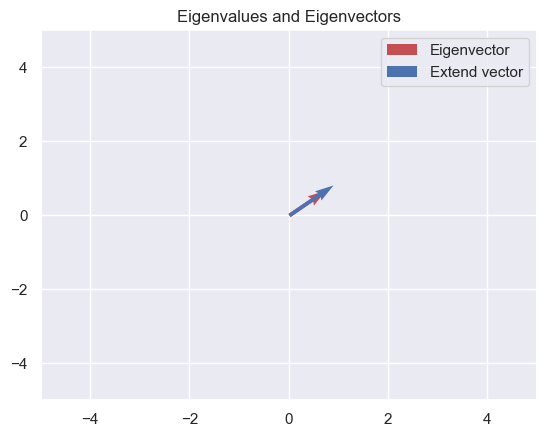

In [10]:
plt.quiver(0, 0, eigenvectors[0, 0], eigenvectors[1, 0], angles='xy', scale_units='xy', scale=1, color='r',
               label=f'Eigenvector')

plt.quiver(0, 0, extend_vec[0], extend_vec[1], angles='xy', scale_units='xy', scale=1, color='b',
               label=f'Extend vector')

plt.xlim([-5, 5])
plt.ylim([-5, 5])
plt.grid(True)
plt.legend()
plt.title('Eigenvalues and Eigenvectors')
plt.show()

# Generate The Fibonacci Sequence

ให้ $\{f_n\}$ เป็น fibonacci sequence; 
$$f_{n} = f_{n-1} + f_{n-2}$$

เมื่อ $f_0 = 0,\  f_1 = 1$

In [11]:
def fibo(n):
    f1, f2 = 0, 1
    
    for _ in range(n):
        fn = f1 + f2
        f1, f2 = f2, fn
        
        yield fn

In [12]:
list(fibo(10))

[1, 2, 3, 5, 8, 13, 21, 34, 55, 89]

เราสามารถเปลี่ยน fibonacci sequence function เป็น first-order function.

$$\begin{align}
f_n &= f_{n-1} + s_{n-1}\\
s_n &= f_{n-1}
\end{align}$$

นอกจากนี้เราสามารถสร้าง functions ข้างบน เป็น matrix transform

$$\begin{bmatrix}
f_n\\
s_n
\end{bmatrix}
=
\begin{bmatrix}
1 & 1\\
1 & 0
\end{bmatrix}
\begin{bmatrix}
f_{n-1}\\
s_{n-1}
\end{bmatrix}$$

In [13]:
fibo_transformer = np.array([[1, 1], 
                             [1, 0]])

init_vect = np.array([[0],
                      [1]])

In [15]:
new_vect = fibo_transformer @ init_vect

for _ in range(10):
    print(new_vect[0])
    new_vect = fibo_transformer @ new_vect

[1]
[1]
[2]
[3]
[5]
[8]
[13]
[21]
[34]
[55]


In [16]:
# Find the eigenvalues and eigenvectors of the matrix

eigvals, eigvects = np.linalg.eig(fibo_transformer)

eigvals

array([ 1.61803399, -0.61803399])

In [17]:
eigvects

array([[ 0.85065081, -0.52573111],
       [ 0.52573111,  0.85065081]])

In [18]:
f = lambda x: x * (eigvects[0, 0] / eigvects[1, 0])
x = np.linspace(0, 100, 100)

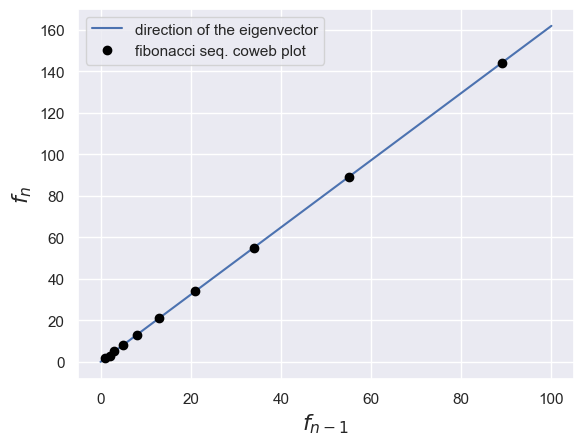

In [19]:
fibo_seq = list(fibo(11))
plt.plot(x, f(x), label='direction of the eigenvector')
plt.plot(fibo_seq[:-1], fibo_seq[1:] , 'o', color='black', label='fibonacci seq. coweb plot')
plt.xlabel('$f_{n-1}$', fontsize=16)
plt.ylabel('$f_{n}$', fontsize=16)
plt.legend()
plt.savefig('eigen_fibo.png');

# Finding Golden Ratio

Transform the fibonacci sequence function to first-order function.

$$\begin{align}
f_n &= f_{n-1} + s_{n-1}\\
s_n &= f_{n-1}
\end{align}$$

Let reconstruct this functions into a matrix transform

$$\begin{bmatrix}
f_n\\
s_n
\end{bmatrix}
=
\begin{bmatrix}
1 & 1\\
1 & 0
\end{bmatrix}
\begin{bmatrix}
f_{n-1}\\
s_{n-1}
\end{bmatrix}$$

Find the eigenvalue of fibonacci transformer matrix:

Consider 
$$\left |\begin{bmatrix}1 - \lambda & 1\\ 1 & 0 - \lambda\end{bmatrix}\right | =  0$$

Implies
$$\begin{align}
\lambda^2 - (1 + 0)\lambda + (1 \times 0 - 1\times 1) &= 0\\
\lambda^2 - \lambda - 1 &= 0
\end{align}$$

From quadratic formula:
$$
x = \frac{{-b \pm \sqrt{{b^2 - 4ac}}}}{{2a}}
$$

where $a$, $b$, and $c$ are coefficients, and $x$ represents the variable.

Implies

$$\lambda = \frac{{-(-1) \pm \sqrt{{(-1)^2 - 4\times 1\times -1)}}}}{{2\times 1}} = \frac{{1 \pm \sqrt{{1 + 4}}}}{{2}} = \frac{{1 \pm \sqrt{{5}}}}{{2}}$$

That means $\lambda_1 \approx 1.618,\ \lambda_2 \approx -0.618$. 

Eigen value of fibonacci transformer matrix is the golden ratio.